In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('GfSD\SDGData.csv', sep=',',decimal='.', skiprows=0)

In [17]:
df_list = []
df_list2 = []
years = []
for year in range(2001,2021):
    years.append(str(year))

In [18]:
# População jovem sem educação, emprego ou treinamento, entre países selecionados (%)
df_  = df.iloc[[102347]]
df__  = df.iloc[[102347,102176]] # Estados Unidos
df_list.append(df_)
eua = df__[years + ['Indicator Name']]
eua = eua.set_index("Indicator Name") # apply right away
eua = eua.transpose()


In [19]:
df_ = df.iloc[[21157]]
df__ = df.iloc[[21155,20984]] # Argentina
df_list.append(df_)
ar = df__[years + ['Indicator Name']]
ar = ar.set_index("Indicator Name") # apply right away
ar = ar.transpose()

In [20]:
df_ = df.iloc[[28907]]
df__ = df.iloc[[28907,28736]] # Brasil
df_list.append(df_)
br = df__[years + ['Indicator Name']]
br = br.set_index("Indicator Name") # apply right away
br = br.transpose()

In [21]:
# Indivíduos usando a Internet (% da população)

df_  = df.iloc[[102176]] # Estados Unidos
df_list2.append(df_)
df_  = df.iloc[[20984]] # Argentina
df_list2.append(df_)
df_ = df.iloc[[28736]] # Brasil
df_list2.append(df_)

Muitas vezes observamos propagandas e veiculos de mídia resaltando o impacto positivo da internet na disseminação de oportunidades ao aumento no acesso a formas de capacitação. Porém, nossa dupla se perguntou : Tal relação realmente existe?

-   Observemos o gráfico a seguir sob a seguinte hipótese : O aumento no uso da internet beneficia o preparo da população jovem.

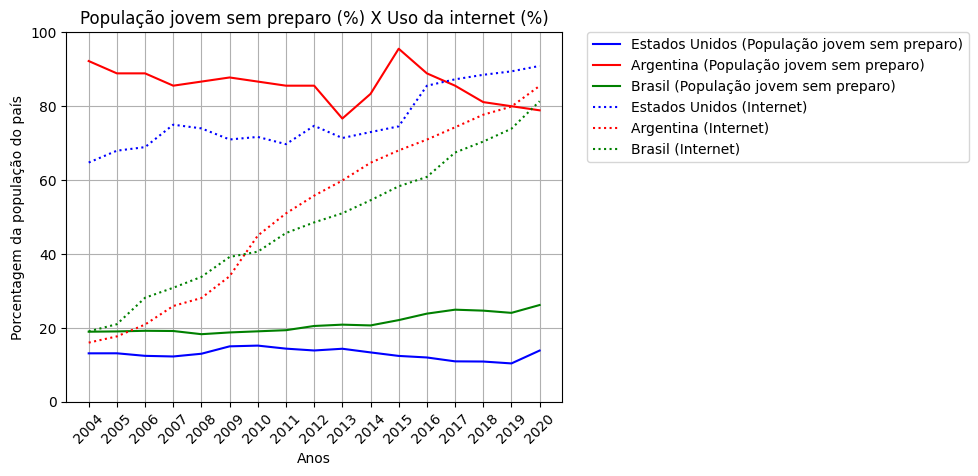

In [22]:
plt.style.use('default')
plt.figure()

color_list = ['b','r','g']
color = 0

for df in df_list:
    years = []
    values = []
    for year in range(2004,2021):
        year_ = str(year)
        dado_invalido = pd.isnull(df[year_])
        df.loc[dado_invalido, year_] = 0
        if year == 2010:
            df.loc[dado_invalido, year_] = (df[str(year-1)] + df[str(year+1)])/2
        if year >= 1994:
            years.append(year)
            values.append(df[year_])
    
    plt.plot(years,values,f'{color_list[color]}')
    color += 1
color = 0
for df in df_list2:
    years = []
    values = []
    for year in range(2004,2021):
        year_ = str(year)
        dado_invalido = pd.isnull(df[year_])
        df.loc[dado_invalido, year_] = 0
        if year == 2010:
            df.loc[dado_invalido, year_] = (df[str(year-1)] + df[str(year+1)])/2
        if year >= 1994:
            years.append(year)
            values.append(df[year_])
    
    plt.plot(years,values,f'{color_list[color]}:')
    color += 1

plt.xticks(years, rotation=45)
plt.yticks([0, 20, 40, 60, 80, 100])
plt.xlabel('Anos')
plt.ylabel('Porcentagem da população do país')
plt.title('População jovem sem preparo (%) X Uso da internet (%)')
plt.legend(['Estados Unidos (População jovem sem preparo)','Argentina (População jovem sem preparo)', 'Brasil (População jovem sem preparo)','Estados Unidos (Internet)','Argentina (Internet)', 'Brasil (Internet)'],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.grid()
plt.show()

Mudanças devido ao Feedback da entrega anterior (APS1): 

    - Troca do database da Republica Dominicana pelo da Argentina, visto que se assemelhava muito à do Brasil.

Correlação entre os dados no gráfico :

In [23]:
br.corr() # Correlação no Brasil

Indicator Name,"Share of youth not in education, employment or training, total (% of youth population)",Individuals using the Internet (% of population)
Indicator Name,,
"Share of youth not in education, employment or training, total (% of youth population)",1.00000,0.85181
Individuals using the Internet (% of population),0.85181,1.00000


In [24]:
eua.corr() # Correlação nos EUA

Indicator Name,"Share of youth not in education, employment or training, total (% of youth population)",Individuals using the Internet (% of population)
Indicator Name,,
"Share of youth not in education, employment or training, total (% of youth population)",1.000000,-0.469135
Individuals using the Internet (% of population),-0.469135,1.000000


In [25]:
ar.corr() # Correlação na Argentina

Indicator Name,"Share of youth not in education, employment or training, total (% of youth population)",Individuals using the Internet (% of population)
Indicator Name,,
"Share of youth not in education, employment or training, total (% of youth population)",1.000000,-0.020604
Individuals using the Internet (% of population),-0.020604,1.000000


Covariância entre os dados no gráfico :

In [26]:
br.cov() # Covariância no Brasil

Indicator Name,"Share of youth not in education, employment or training, total (% of youth population)",Individuals using the Internet (% of population)
Indicator Name,,
"Share of youth not in education, employment or training, total (% of youth population)",6.248709,49.174250
Individuals using the Internet (% of population),49.174250,505.474672


In [27]:
eua.cov() # Covariância nos EUA

Indicator Name,"Share of youth not in education, employment or training, total (% of youth population)",Individuals using the Internet (% of population)
Indicator Name,,
"Share of youth not in education, employment or training, total (% of youth population)",1.712220,-6.649851
Individuals using the Internet (% of population),-6.649851,117.346172


In [28]:
ar.cov() # Covariância na Argentina

Indicator Name,"Share of youth not in education, employment or training, total (% of youth population)",Individuals using the Internet (% of population)
Indicator Name,,
"Share of youth not in education, employment or training, total (% of youth population)",1.032059,-0.507885
Individuals using the Internet (% of population),-0.507885,693.759382


Com base na informação do gráfico e dos resultados obtidos referentes a correlação e a covariância, encontramos uma similaridade inesperada somada a uma contradição com o gráfico: 

    - A correlação e covariância entre os dados da Argentina e dos EUA são ambas negativas, porém suas tendêcias de crescimento/decrescimento e média percentual divergem muito.

    - Os indices do Brasil são ambos positivos, apesar dele estar entre os EUA e a Argentina em termos de despreparo e ter menor acesso a internet que a Argentina.

- Tais dados indicam, no mínimo, que covariância e correlação não demonstram a relação entre os dados, sendo que haveria um padrão tal fosse o caso e o Brasil teria indices diferentes.

- O acesso a internet cresceu muito neste período, porém o indíce de despreparo entre jovens variou de forma autonôma na Argentina.

- Este fato nos demostra de forma visível que a nossa hipótese se provou falha, visto que elimina possíveis especulações quanto a uma relação pequena entre os dados, que poderia ter sido levantada caso tivéssemos análisado somente os dados dos EUA e do Brasil, ou não tivéssemos as divergência matemáticas de correlação/covariância.

Comentários da correção:

1.  A legenda do gráfico está um pouco confusa - o leitor precisa supor um link entre a anotação "(internet)" e a grandeza medida, e as linhas cheias não indicam do que se tratam. O texto está confuso - não ficou claro o que vocês querem dizer com as análises. As análises dos gráficos estão misturadas com especulações - o fato observável é o número que foi medido; o restante são especulações sobre o fato. Uma boa ideia é evitar palavras difíceis ("ademais") ou opiniões muito especulativas, como "similaridade inesperada". Eu diria que o mais interessante é observar os dados e somente analisar o que eles dizem a respeito da sua hipótese e talvez de algumas implicações diretas (exemplo: o aumento no acesso à Internet não necessariamente leva à melhoria na educação).

2. A ordem de apresentação dos resultados ficou confusa. São apresentadas primeiro as conclusões sobre a covariância e correlação e só depois os valores obtdos.

Como corrigimos:

1. Agora está clara a medida, com atualização da legenda, indicando do as linhas se tratam. Certas partes do texto foram revisadas para corrigir o que foi apontado no comentário.

2. A ordem foi alterada para que os resultados sejam apresentados antes das conclusões.
1. Mudança nas legendas para primeiro transmitir o dado e depois indicar seu detentor, para facilitar o entendimento de que serão as mesmas medidas do título.
